# Machine Learning for Time Series Data and Feature Engineering for Machine Learning in Python

# Machine Learning for Time Series Data in Python

Real-world data sets are essential for developing and testing machine learning models. You might just need some data to play with with an algorithm. You can also wish to assess your model by creating a benchmark or identifying its flaws using several data sets. You might also want to make synthetic datasets to test your algorithms under controlled conditions by introducing noise, correlations, or redundant data to the data.

Loading Data Using pandas-datareader

Anyone can use the pandas datareader library to get data from a variety of places, including Yahoo Finance for financial market data, the World Bank for global development data, and the St. Louis Fed for economic data. We'll teach you how to load data from several sources in this section.

Pandas datareader gets data from the web in real time and assembles it into a pandas DataFrame behind the scenes. Each data source requires a distinct reader due to the drastically diverse structure of web pages. As a result, pandas datareader can only read from a small number of sources, most of which are connected to financial and economic time series.

Data retrieval is straightforward. Because we know Apple's stock ticker is AAPL, we can collect daily historical Apple stock prices from Yahoo Finance as follows:

In [1]:
import pandas_datareader as pdr

# Reading Apple shares from yahoo finance server    
shares_df = pdr.DataReader('AAPL', 'yahoo', start='2021-01-01', end='2021-12-31')
# Look at the data read
print(shares_df)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-12-31  134.740005  131.720001  134.080002  132.690002   99116600.0   
2021-01-04  133.610001  126.760002  133.520004  129.410004  143301900.0   
2021-01-05  131.740005  128.429993  128.889999  131.009995   97664900.0   
2021-01-06  131.050003  126.379997  127.720001  126.599998  155088000.0   
2021-01-07  131.630005  127.860001  128.360001  130.919998  109578200.0   
...                ...         ...         ...         ...          ...   
2021-12-27  180.419998  177.070007  177.089996  180.330002   74919600.0   
2021-12-28  181.330002  178.529999  180.160004  179.289993   79144300.0   
2021-12-29  180.630005  178.139999  179.330002  179.380005   62348900.0   
2021-12-30  180.570007  178.089996  179.470001  178.199997   59773000.0   
2021-12-31  179.229996  177.259995  178.089996  177.570007   64062300.0   

             Adj Close  

The first argument to DataReader() specifies the ticker, while the second argument specifies the data source.

We can also get stock price history from many firms using a list of tickers:

In [2]:
companies = ['AAPL', 'MSFT', 'GE']
shares_multiple_df = pdr.DataReader(companies, 'yahoo', start='2021-01-01', end='2021-12-31')
print(shares_multiple_df.head())

Attributes   Adj Close                              Close              \
Symbols           AAPL        MSFT         GE        AAPL        MSFT   
Date                                                                    
2020-12-31  131.515976  220.115952  86.050934  132.690002  222.419998   
2021-01-04  128.264984  215.434982  83.421608  129.410004  217.690002   
2021-01-05  129.850830  215.642776  85.811913  131.009995  217.899994   
2021-01-06  125.479851  210.051300  90.512840  126.599998  212.250000   
2021-01-07  129.761627  216.028748  89.795753  130.919998  218.289993   

Attributes                   High                                Low  \
Symbols            GE        AAPL        MSFT         GE        AAPL   
Date                                                                   
2020-12-31  86.400002  134.740005  223.000000  86.639999  131.720001   
2021-01-04  83.760002  133.610001  223.000000  87.199997  126.760002   
2021-01-05  86.160004  131.740005  218.520004  87.04000

Because of the structure of DataFrames, extracting parts of the data is simple. For example, for some dates, we can plot only the daily close price using the following formula:

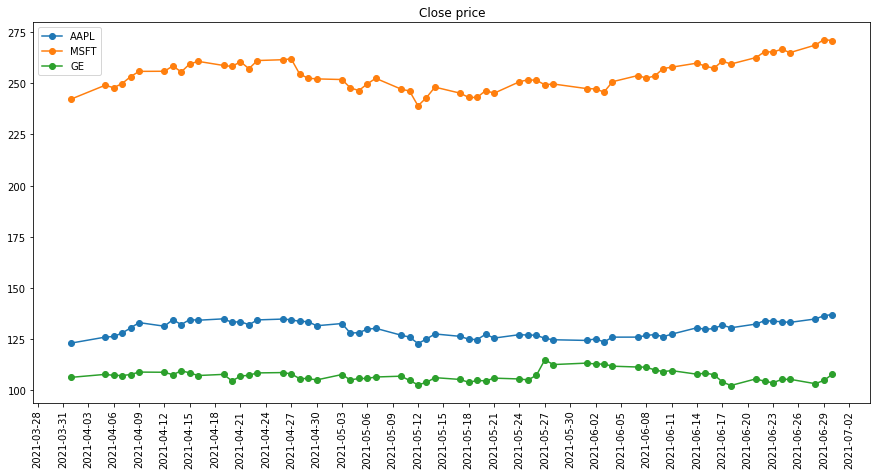

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# General routine for plotting time series data
def plot_timeseries_df(df, attrib, ticker_loc=1, title='Timeseries', 
                       legend=''):
    fig = plt.figure(figsize=(15,7))
    plt.plot(df[attrib], 'o-')
    _ = plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
    plt.title(title)
    plt.gca().legend(legend)
    plt.show()

plot_timeseries_df(shares_multiple_df.loc["2021-04-01":"2021-06-30"], "Close",
                   ticker_loc=3, title="Close price", legend=companies)

The following is the whole code:

Attributes   Adj Close                              Close              \
Symbols           AAPL        MSFT         GE        AAPL        MSFT   
Date                                                                    
2020-12-31  131.515976  220.115967  86.050941  132.690002  222.419998   
2021-01-04  128.264999  215.434967  83.421608  129.410004  217.690002   
2021-01-05  129.850830  215.642792  85.811897  131.009995  217.899994   
2021-01-06  125.479843  210.051300  90.512833  126.599998  212.250000   
2021-01-07  129.761627  216.028748  89.795753  130.919998  218.289993   
...                ...         ...        ...         ...         ...   
2021-12-27  179.836319  341.743378  94.535088  180.330002  342.450012   
2021-12-28  178.799149  340.545837  95.214478  179.289993  341.250000   
2021-12-29  178.888916  341.244415  94.704933  179.380005  341.950012   
2021-12-30  177.712143  338.619843  94.615005  178.199997  339.320007   
2021-12-31  177.083878  335.626038  94.385216  177.

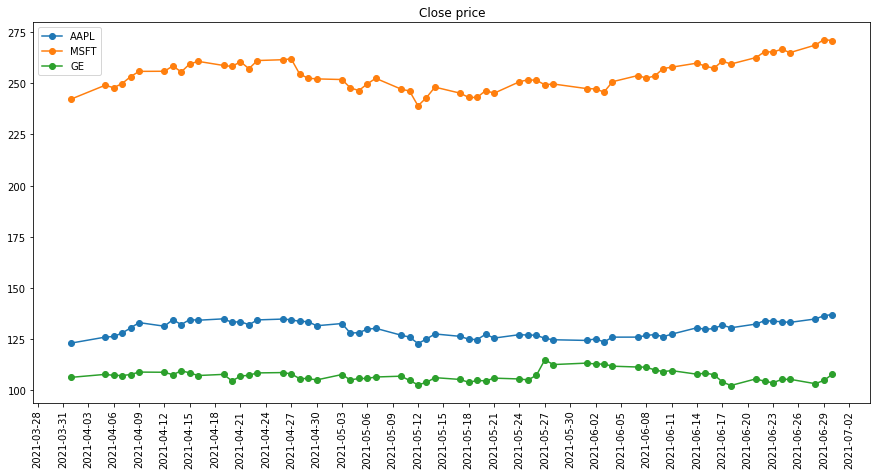

In [4]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

companies = ['AAPL', 'MSFT', 'GE']
shares_multiple_df = pdr.DataReader(companies, 'yahoo', start='2021-01-01', end='2021-12-31')
print(shares_multiple_df)

def plot_timeseries_df(df, attrib, ticker_loc=1, title='Timeseries', legend=''):
    "General routine for plotting time series data"
    fig = plt.figure(figsize=(15,7))
    plt.plot(df[attrib], 'o-')
    _ = plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
    plt.title(title)
    plt.gca().legend(legend)
    plt.show()

plot_timeseries_df(shares_multiple_df.loc["2021-04-01":"2021-06-30"], "Close",
                   ticker_loc=3, title="Close price", legend=companies)

Using pandas-datareader to read from another data source has a similar syntax.

The steps for obtaining two consumer price indices, CPIAUCSL and CPILFESL, and plotting them are as follows:

            CPIAUCSL  CPILFESL
DATE                          
2010-01-01   217.488   220.633
2010-02-01   217.281   220.731
2010-03-01   217.353   220.783
2010-04-01   217.403   220.822
2010-05-01   217.290   220.962
...              ...       ...
2021-08-01   273.092   279.306
2021-09-01   274.214   280.017
2021-10-01   276.590   281.705
2021-11-01   278.524   283.179
2021-12-01   280.126   284.770

[144 rows x 2 columns]


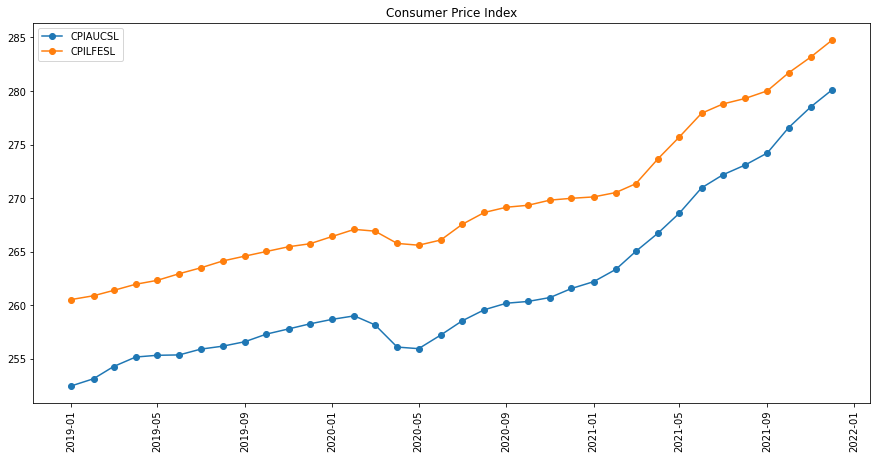

In [5]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Read data from FRED and print
fred_df = pdr.DataReader(['CPIAUCSL','CPILFESL'], 'fred', "2010-01-01", "2021-12-31")
print(fred_df)

# Show in plot the data of 2019-2021
fig = plt.figure(figsize=(15,7))
plt.plot(fred_df.loc["2019":], 'o-')
plt.xticks(rotation=90)
plt.legend(fred_df.columns)
plt.title("Consumer Price Index")
plt.show()

For analyzing and forecasting time-based data, time series algorithms are widely employed. Machine learning has developed as an effective tool for recognizing hidden complexities in time series data and making reasonable forecasts, given the complexity of other elements outside time.

# Feature Engineering for Machine Learning in Python


The most crucial, yet often underestimated, talent in predictive modeling is feature engineering. We use it without even realizing it in our daily lives!

Lets imagine you're a bartender and someone approaches you and requests a vodka tonic. When you ask for identification, you notice the person's birthday is "09/12/1998." This information isn't particularly useful, but you can tally up the years with some rapid mental math and discover that the person is 22 years old (which is above the legal drinking age). What happened there, exactly? To answer the question "Is this individual authorized to drink?" you took a piece of data ("09/12/1998") and translated it into another variable (age).

This is exactly what feature engineering is for machine learning models. We alter and manipulate our data to provide our model(s) the best possible representation of our data in order to better forecast our desired outcome. If this isn't completely evident right now, it will be when we go through real-life instances in this essay.

For the following reasons, feature engineering is both beneficial and necessary:

- Feature engineering approaches like as standardization and normalization typically result in better weighting of variables, which increases accuracy and, in certain cases, speeds up convergence.

- Improved interpretability of data relationships: When we create new features and understand how they connect to our desired outcome, we have a better comprehension of the data. We may still acquire a high assessment score if we skip the feature engineering step and utilize complicated models (which to a significant extent automate feature engineering), but at the cost of a deeper grasp of our data and its relationship with the goal variable.

Because most models cannot accept specific data forms, feature engineering is required. Missing values cannot be handled by models like linear regression on their own; they must be imputed (filled in). In the next part, we'll examine some examples of this.

Exploratory Data Analysis (EDA), or the initial analysis of our data, is the first step in every data science pipeline. As we gain a better understanding of what features we need to create/modify, EDA is a critical pre-cursor stage. Depending on how unstructured or chaotic the data is, the following stage is usually data cleaning/standardization.

The following step is feature engineering, which begins with an evaluation of the data's baseline performance. Then, using a feature selection method, we iteratively create features and continuously evaluate model performance (and compare it to the baseline performance) until we are satisfied with the findings.

For most tabular datasets, there are two major ways to feature engineering:

- The checklist approach: create features using proven and true approaches.
- The domain-based approach: involves using domain knowledge about the dataset's subject matter to build additional features.

We'll now take a closer look at these methods using real-world data. Note that these examples are procedural in nature and are intended to demonstrate how to implement it in Python. The case study that follows this part will show you a real-world end-to-end scenario application of the practices discussed here.

Before loading the dataset, we need to import the dependencies listed below.

In [6]:
# dependencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

We'll use a dataset on grocery sales to demonstrate the checklist approach.

In [7]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# The Checklist Approach


Numeric Aggregations


For longitudinal or panel data, when individuals are repeated, numerical aggregation is a typical feature engineering strategy. We have categorical variables with repeated observations in our dataset (for example, we have multiple entries for each supermarket branch).

Numeric aggregation involves three parameters:

- Categorical column
- Numeric column(s) to be aggregated
- Aggregation type: Mean, median, mode, standard deviation, variance, count etc.

Three instances of numeric aggregations based on mean, standard deviation, and count are shown in the code chunk below.

In [8]:
# Numeric aggregations

grouped_df = df.groupby('Branch')

df[['tax_branch_mean','unit_price_mean']] = grouped_df[['Tax 5%', 'Unit price']].transform('mean')

df[['tax_branch_std','unit_price_std']] = grouped_df[['Tax 5%', 'Unit price']].transform('std')

df[['product_count','gender_count']] = grouped_df[['Product line', 'Gender']].transform('count')

And here are the new features we've added.

In [9]:
df[['Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)

,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,A,14.874001,54.780853,11.030477,26.132127,340,340
1,C,16.052367,56.609024,12.531470,27.179799,328,328
2,A,14.874001,54.780853,11.030477,26.132127,340,340
3,A,14.874001,54.780853,11.030477,26.132127,340,340
4,A,14.874001,54.780853,11.030477,26.132127,340,340
5,C,16.052367,56.609024,12.531470,27.179799,328,328
6,A,14.874001,54.780853,11.030477,26.132127,340,340
7,C,16.052367,56.609024,12.531470,27.179799,328,328
8,A,14.874001,54.780853,11.030477,26.132127,340,340
9,B,15.232024,55.659277,11.545122,26.224559,332,332


There appear to be duplicate rows because we're viewing a column subset of the whole df. When you see the rest of the columns, you'll discover that while there are no duplicate rows, there are duplicate values. This is intentional.

Choosing numeric aggregation parameters


In [10]:
df[['Tax 5%', 'Unit price', 'Branch', 'tax_branch_mean', 'unit_price_mean']]

,Tax 5%,Unit price,Branch,tax_branch_mean,unit_price_mean
0,26.1415,74.69,A,14.874001,54.780853
1,3.8200,15.28,C,16.052367,56.609024
2,16.2155,46.33,A,14.874001,54.780853
3,23.2880,58.22,A,14.874001,54.780853
4,30.2085,86.31,A,14.874001,54.780853
...,...,...,...,...,...
995,2.0175,40.35,C,16.052367,56.609024
996,48.6900,97.38,B,15.232024,55.659277
997,1.5920,31.84,A,14.874001,54.780853
998,3.2910,65.82,A,14.874001,54.780853


Indicator Variables
- To signify the absence or availability of some information, indicator variables only take on the values 0 or 1.

Interaction Terms
- The presence of interaction effects between two or more variables leads to the creation of interaction terms. Although statistical methods can help detect them, subject expertise plays a key role (which is beyond the scope of this article). Free shipping, for example, may affect customer rating, but free shipping combined with quantity may have a different effect, which would be important to encode (assuming customer rating is the target variable in this case). The variable unit price 50 * qty is defined to be exactly that.

In [12]:
df['unit_price_50'] = np.where(df['Unit price'] > 50, 1, 0)
df['unit_price_50 * qty'] = df['unit_price_50'] * df['Quantity']

In [13]:
df[['unit_price_50', 'unit_price_50 * qty']].head()

,unit_price_50,unit_price_50 * qty
0,1,7
1,0,0
2,0,0
3,1,8
4,1,7


# Numeric Transformations


Numeric transformations are not considered feature engineering by some data scientists. This is due to the fact that many models, particularly newer ones such as tree-based models (decision trees, random forests, and so on), are unaffected by these modifications. To put it another way, completing these modifications has no effect on predictive performance. However, because other models, such as linear regression, are sensitive to the scale of their variables, these changes can make a huge impact.

To account for the right skew in the variable cogs, we create a new variable log cogs. The result is depicted in the graphs below the code portion.

If we feel the relationship between a predictor and target variable is not linear, but quadratic in nature, we can perform different adjustments such as squaring a variable (seen in the code chunk below) (as a predictor variable changes, target variable changes by an order of 2).

It's up to your decision and domain knowledge whether we use cubed variables or any n degree polynomial term.

In [14]:
# numeric transformations

df['log_cogs'] = np.log(df['cogs'] + 1)
df['gross income squared'] = np.square(df['gross income'])

In [15]:
df[['cogs', 'log_cogs', 'gross income', 'gross income squared']].head()

,cogs,log_cogs,gross income,gross income squared
0,522.83,6.261167,26.1415,683.378022
1,76.40,4.348987,3.8200,14.592400
2,324.31,5.784779,16.2155,262.942440
3,465.76,6.145815,23.2880,542.330944
4,604.17,6.405509,30.2085,912.553472


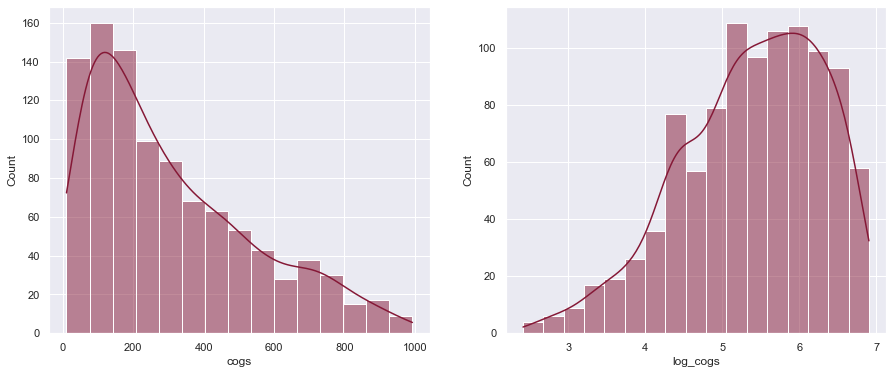

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['cogs'], ax=ax1, kde=True)
sns.histplot(df['log_cogs'], ax=ax2, kde=True);

As can be seen, the log transformation made the Cost of Goods Sold (cogs) distribution more regularly distributed (or less right-skewed). Outliers that generated the initial skewness will have less of an impact on the weights/coefficients of models like linear regression.



Simillary in checklist approach we can do :
- Numeric Scaling
- Categorical Variable Handling
- Missing Value Handling
- Date-Time Decomposition


# Domain-based Approach


The line between domain-based and checklist-based approaches to feature engineering is blurry. I believe the distinction is purely subjective; with domain-based features, you still use many of the techniques we've already discussed, but with a strong focus on domain knowledge.

Many ad-hoc measures, such as ratios and formulas, will be used in domain-based features. In the case study example below, we'll see examples of this.

Example - Movie Box Office Data


We'll be using movie box office data for our case study. More information on the dataset can be found by going here.

Normally, we would begin by performing exploratory data analysis on the dataset, but as this is a feature engineering post, we will concentrate on that. Note that many of the feature engineering techniques shown below were inspired by a Kaggle kernel found here.

In [19]:
df = pd.read_csv('movies.csv')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Filling missing values

Let's start with missing values. We use Seaborn to display them and then use the median and mode to fill in numeric and categorical missing values.

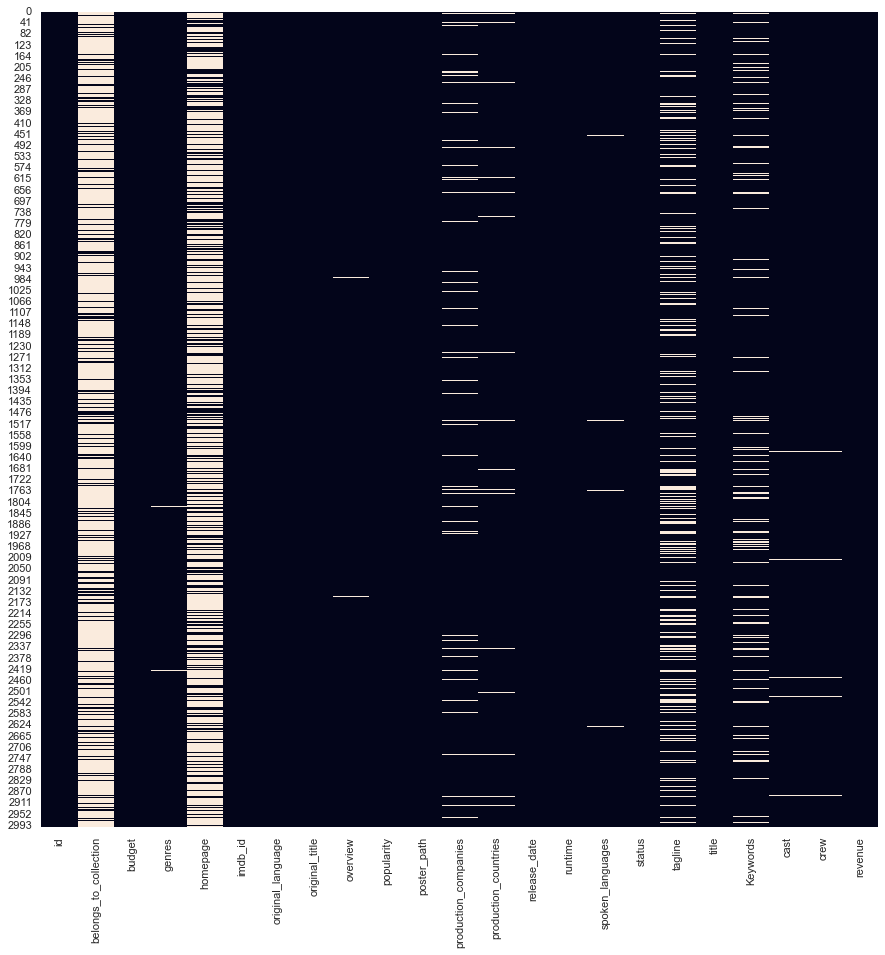

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

The median will be used to fill in the missing numeric variables, and the mode will be used to fill in the blank category column. After we finish feature engineering the other columns, we'll address the categorical missing data (at the very end).

There is no clear and fast rule for deciding which missing value imputation method to use. Most practitioners evaluate several missing value imputation strategies before selecting the one with the highest evaluation score.

# Decomposing Date

We can now break down the date column into its constituent characteristics. Because there is no quantitative relationship between month and day, we encode them as string variables. Days and months have set boundaries (the month cannot exceed 12 and the day cannot exceed 31). The days 10 and 31 are just different (think of them as categories).

Let's separate the year, month, and day columns in the dataframe:

In [21]:
df['release_date'] = pd.to_datetime(df['release_date'])

# decomposition
df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month.astype(str)
df['Day'] = df['release_date'].dt.day.astype(str)

df[['Year','Month','Day']].head()

,Year,Month,Day
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5


# Adjusting budget

We use the logarithm of the budget to account for the right-skewed nature of the budget. Because many movies have a budget of $0, we use the logarithm of the budget Plus 1 instead of the logarithm of 0.

In [22]:
df['log_budget'] = np.log(df['budget'] + 1)

plot_hist(df['budget'], df['log_budget'])

NameError: name 'plot_hist' is not defined

# Prediction


We can develop a simple regression model to forecast movie income to show that feature engineering works and improves model performance.

Normally, we choose which features to utilize using a process called feature selection, but since this post is about feature engineering, we'll use a simpler method: correlation analysis.

We can see that most of the variables we produced aren't very predictive of revenue by plotting the correlation matrix (below). Most of the time, this is what happens: you design a lot of features, but only a few of them are useful - but the ones that are valuable make a difference.